In [1]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import acquire 
import env
# default pandas decimal number display format
pd.options.display.float_format = '{:.2f}'.format

### 1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.

- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.

- Only include properties that include a latitude and longitude value.

In [2]:
df = acquire.get_zillow_data()


In [3]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,60590630072012.00,0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,61110010023006.00,0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,60590218022012.00,0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,60373001001006.00,-0.10,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,60371236012000.00,0.01,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77574 entries, 0 to 77573
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77574 non-null  int64  
 1   parcelid                      77574 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77574 non-null  float64
 6   bedroomcnt                    77574 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49808 non-null  float64
 9   calculatedbathnbr             76959 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77374 non-null  float64
 13  f

In [5]:
df.dtypes

id                            int64
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
                             ...   
buildingclassdesc            object
heatingorsystemdesc          object
propertylandusedesc          object
storydesc                    object
typeconstructiondesc         object
Length: 68, dtype: object

In [6]:
df.shape

(77574, 68)

In [7]:
df.isnull().sum()/len(df)*100

id                          0.00
parcelid                    0.00
airconditioningtypeid      67.76
architecturalstyletypeid   99.73
basementsqft               99.94
                            ... 
buildingclassdesc          99.98
heatingorsystemdesc        36.10
propertylandusedesc         0.00
storydesc                  99.94
typeconstructiondesc       99.71
Length: 68, dtype: float64

In [8]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

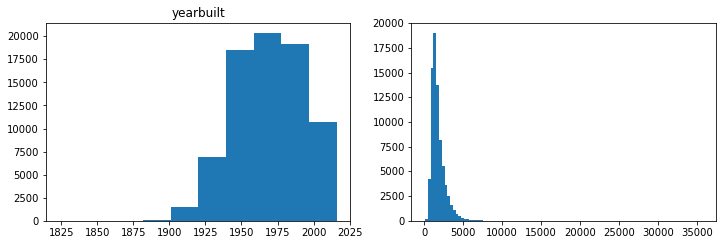

In [9]:
#plotting distributions

plt.figure(figsize = (12,8))
plt.subplot(221)
plt.hist(df.yearbuilt)
plt.title('yearbuilt')

plt.subplot(222)
plt.hist(df.calculatedfinishedsquarefeet, bins=100)

plt.tight_layout;

### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.


In [10]:
#total missing values
nul_val = df.isnull().sum()

In [11]:
nul_val_percent = (df.isnull().sum() /len(df))*100
nul_val_percent

id                          0.00
parcelid                    0.00
airconditioningtypeid      67.76
architecturalstyletypeid   99.73
basementsqft               99.94
                            ... 
buildingclassdesc          99.98
heatingorsystemdesc        36.10
propertylandusedesc         0.00
storydesc                  99.94
typeconstructiondesc       99.71
Length: 68, dtype: float64

In [12]:
#making a table
nul_val_table = pd.concat([nul_val, nul_val_percent], axis=1)
nul_val_table

,0,1
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,52568,67.76
architecturalstyletypeid,77368,99.73
basementsqft,77524,99.94
...,...,...
buildingclassdesc,77559,99.98
heatingorsystemdesc,28005,36.10
propertylandusedesc,0,0.00
storydesc,77524,99.94


In [13]:
# we have the columns as 0 and 1 - rename
nul_val_table = nul_val_table.rename(columns = { 0 : "# of missing values", 1: 
                               "% of missing values"})
nul_val_table

,# of missing values,% of missing values
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,52568,67.76
architecturalstyletypeid,77368,99.73
basementsqft,77524,99.94
...,...,...
buildingclassdesc,77559,99.98
heatingorsystemdesc,28005,36.10
propertylandusedesc,0,0.00
storydesc,77524,99.94


In [14]:
# function it from above cells
def missing_values_table(df):
    nul_val = df.isnull().sum()
    nul_val_percent = (df.isnull().sum() /len(df))*100
    nul_val_table = pd.concat([nul_val, nul_val_percent], axis=1)
    nul_val_table = nul_val_table.rename(columns = { 0 : "# of missing values", 1: 
                               "% of missing values"})
    
    return nul_val_table

In [15]:
missing_values_table(df)

,# of missing values,% of missing values
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,52568,67.76
architecturalstyletypeid,77368,99.73
basementsqft,77524,99.94
...,...,...
buildingclassdesc,77559,99.98
heatingorsystemdesc,28005,36.10
propertylandusedesc,0,0.00
storydesc,77524,99.94


In [16]:
#would be interested in sorting this by value

In [17]:
#Class Code:
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing / rows
    cols_missing = pd.DataFrame({'number_missing_rows': num_missing, 'percent_rows_missing': pct_missing})
    return cols_missing

In [18]:
nulls_by_column = nulls_by_col(df)
nulls_by_column.sort_values(by="percent_rows_missing", ascending=False).head(40)


,number_missing_rows,percent_rows_missing
buildingclassdesc,77559,1.00
buildingclasstypeid,77559,1.00
finishedsquarefeet13,77532,1.00
storytypeid,77524,1.00
basementsqft,77524,1.00
storydesc,77524,1.00
yardbuildingsqft26,77504,1.00
fireplaceflag,77402,1.00
architecturalstyletypeid,77368,1.00
architecturalstyledesc,77368,1.00


### 4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [19]:
#jared's function
def describe_column(df, col):
    na_count =df[col].isna().sum()
    na_percent = (na_count/len(df[col]))*100
    print(f'Number of missing values: {na_count}')
    print(f'Percent values missing: {na_percent}')
    print()
    print('Value counts:')
    print(df[col].describe())
    print(df[col].value_counts())
    plt.hist(df[col])
    plt.show()

Number of missing values: 52568
Percent values missing: 67.764972800165

Value counts:
count   25006.00
mean        1.81
std         2.97
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        13.00
Name: airconditioningtypeid, dtype: float64
1.00     23185
13.00     1575
5.00       167
11.00       53
9.00        26
Name: airconditioningtypeid, dtype: int64


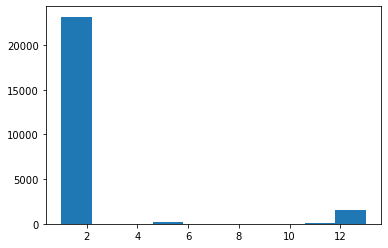

In [20]:
describe_column(df, 'airconditioningtypeid')

In [21]:
pd.DataFrame(df.isnull().sum(axis=1))

,0
0,36
1,33
2,34
3,32
4,29
...,...
77569,29
77570,33
77571,32
77572,32


In [22]:
pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index().groupby('num_cols_missing').count().reset_index().rename(columns = {'index': 'num_rows' })



,num_cols_missing,num_rows
0,23,2
1,24,13
2,25,24
3,26,65
4,27,316
5,28,457
6,29,5285
7,30,3465
8,31,9911
9,32,12606


In [23]:
#class
df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index().groupby('num_cols_missing')\
.count().reset_index().rename(columns = {'index': 'num_rows'})

df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
df2.head()

,num_cols_missing,num_rows,pct_cols_missing
0,23,2,0.34
1,24,13,0.35
2,25,24,0.37
3,26,65,0.38
4,27,316,0.40


In [24]:
def cols_missing(df):
    df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index()\
    .groupby('num_cols_missing').count().reset_index().\
    rename(columns = {'index': 'num_rows' })
    df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
    return df2


In [25]:
#added with percent missing
cols_missing(df).sort_values(by = ['pct_cols_missing'], ascending = False)


,num_cols_missing,num_rows,pct_cols_missing
25,48,3,0.71
24,47,3,0.69
23,46,5,0.68
22,45,50,0.66
21,44,79,0.65
20,43,29,0.63
19,42,26,0.62
18,41,29,0.60
17,40,230,0.59
16,39,285,0.57


# Prepare:

### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

### Most code pulled from codeup review

In [26]:
df.shape

(77574, 68)

In [27]:
#following code - looking at value counts for 'unitcnt'

df.unitcnt.value_counts(dropna = False)


1.00      47412
NaN       26872
2.00       2031
4.00        726
3.00        529
45.00         1
42.00         1
6.00          1
237.00        1
Name: unitcnt, dtype: int64

In [28]:
# restrict df to only properties that meet single unit criteria

single_use = [261, 262, 264, 266, 268, 273, 276, 279]
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]


In [29]:
df.isnull().sum()

id                              0
parcelid                        0
airconditioningtypeid       49113
architecturalstyletypeid    73529
basementsqft                73685
                            ...  
buildingclassdesc           73735
heatingorsystemdesc         25329
propertylandusedesc             0
storydesc                   73685
typeconstructiondesc        73513
Length: 68, dtype: int64

In [30]:
# use your judgement to remove certain columns which you don't need

cols_to_remove = ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc', 'unitcnt']

In [31]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [32]:
# use the function defined above to remove the columns not needed:

df = remove_columns(df, cols_to_remove)

In [48]:
# take a look at null counts again

#something is wrong - look at class exercise for full review

df.isnull().sum()

parcelid                            0
airconditioningtypeid           49113
architecturalstyletypeid        73529
basementsqft                    73685
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid             73735
buildingqualitytypeid           26885
decktypeid                      73124
finishedfloor1squarefeet        67723
calculatedfinishedsquarefeet        0
finishedsquarefeet13            73709
finishedsquarefeet15            73697
finishedsquarefeet50            67723
finishedsquarefeet6             73577
fips                                0
fireplacecnt                    65481
garagecarcnt                    48419
garagetotalsqft                 48419
hashottuborspa                  72197
latitude                            0
longitude                           0
lotsizesquarefeet                8123
poolcnt                         57692
poolsizesum                     72871
pooltypeid10                    73271
pooltypeid2 

In [50]:
df.heatingorsystemdesc.value_counts(dropna = False)


Central       33304
NaN           25329
Floor/Wall    13273
Yes             850
Forced air      775
Solar           104
None             60
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [51]:
#county
df.fips.value_counts()


6037.00    47330
6059.00    20289
6111.00     6116
Name: fips, dtype: int64

In [52]:
# how many missing values by county?
df[df.fips == 6111].heatingorsystemdesc.value_counts(dropna = False)

NaN    6116
Name: heatingorsystemdesc, dtype: int64

In [56]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [57]:
# use the function defined above:

df = handle_missing_values(df)

### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:
- A dataframe

- A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).

- A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

- The output:

- The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

- hint:
- Look up the dropna documentation.
- You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
- Make use of inplace, i.e. inplace=True/False.

In [58]:
def wrangle_zillow():
    df = pd.read_csv('zillow.csv')
    
    # Restrict df to only properties that meet single unit use criteria
    single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]
    
    # Restrict df to only those properties with at least 1 bath & bed and 350 sqft area
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]

    # Handle missing values i.e. drop columns and rows based on a threshold
    df = handle_missing_values(df)
    
    # Add column for counties
    df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                           np.where(df.fips == 6059, 'Orange', 
                                   'Ventura'))    
    # drop columns not needed
    df = remove_columns(df, ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc','heatingorsystemdesc','unitcnt'
                            ,'buildingqualitytypeid'])


    # replace nulls in unitcnt with 1
#     df.unitcnt.fillna(1, inplace = True)
    
    # assume that since this is Southern CA, null means 'None' for heating system
#     df.heatingorsystemdesc.fillna('None', inplace = True)
    
    # replace nulls with median values for select columns
    df.lotsizesquarefeet.fillna(7313, inplace = True)
#     df.buildingqualitytypeid.fillna(6.0, inplace = True)

    # Columns to look for outliers
    df = df[df.taxvaluedollarcnt < 5_000_000]
    df[df.calculatedfinishedsquarefeet < 8000]
    
    # Just to be sure we caught all nulls, drop them here
    df = df.dropna()
    
    return df

In [60]:
df = wrangle_zillow()
df.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,0,14297519,3.50,4.00,3100.00,6059.00,33634931.00,-117869207.00,4506.00,60590630.07,...,0.00,1998.00,485713.00,1023282.00,2016.00,537569.00,11013.72,0.03,2017-01-01,Orange
1,1,17052889,1.00,2.00,1465.00,6111.00,34449266.00,-119281531.00,12647.00,61110010.02,...,5.00,1967.00,88000.00,464000.00,2016.00,376000.00,5672.48,0.06,2017-01-01,Ventura
2,2,14186244,2.00,3.00,1243.00,6059.00,33886168.00,-117823170.00,8432.00,60590218.02,...,6.00,1962.00,85289.00,564778.00,2016.00,479489.00,6488.30,0.01,2017-01-01,Orange
3,3,12177905,3.00,4.00,2376.00,6037.00,34245180.00,-118240722.00,13038.00,60373001.00,...,0.00,1970.00,108918.00,145143.00,2016.00,36225.00,1777.51,-0.10,2017-01-01,Los_Angeles
4,4,10887214,3.00,3.00,1312.00,6037.00,34185120.00,-118414640.00,278581.00,60371236.01,...,0.00,1964.00,73681.00,119407.00,2016.00,45726.00,1533.89,0.01,2017-01-01,Los_Angeles


In [62]:
df.isnull().sum()

Unnamed: 0                      0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
county                          0
dtype: int64

### 3. Decide how to handle the remaining missing values:

Fill with constant value.
Impute with mean, median, mode.
Drop row/column

In [63]:
#### REVIEW THIS #### 

###  wrangle_zillow.py


# Mall Customers


- notebook
- Acquire data from mall_customers.customers in mysql database.
- Summarize data (include distributions and descriptive statistics).
- Detect outliers using IQR.
- Split data (train, validate, and test split).
- Encode categorical columns using a one hot encoder (pd.get_dummies).
- Handles missing values.
- Scaling


In [34]:
# from our acquire.py:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
def get_mallcustomer_data():
    df = pd.read_sql('SELECT * FROM customers;', get_connection('mall_customers'))
    return df.set_index('customer_id')

In [35]:
mall_df = get_mallcustomer_data()

In [36]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [37]:
mall_df.shape

(200, 4)

In [38]:
mall_df.columns

Index(['gender', 'age', 'annual_income', 'spending_score'], dtype='object')

In [39]:
mall_df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

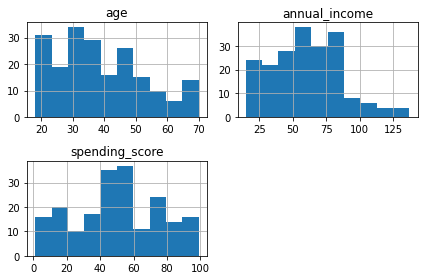

In [40]:
mall_df.hist()
plt.tight_layout();

In [41]:
def outlier_function(df, cols, k):
# function to detect and handle oulier using IQR rule
    for col in df[cols]:
        q1 = df.annual_income.quantile(0.25)
        q3 = df.annual_income.quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df

In [42]:
mall_df = outlier_function(mall_df, ['age', 'annual_income', 'spending_score'], 1.5)


In [43]:
# split df into test (20%) and train_validate (80%)
train_validate, test = train_test_split(mall_df, test_size=.2, random_state=123)

# split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [44]:
train.shape, validate.shape, test.shape


((110, 4), (48, 4), (40, 4))

In [45]:
#get dummies - for gender

dummy_df = pd.get_dummies(mall_df.gender, drop_first=True) # the only catagorical column
mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns=['gender'])

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('number').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [73]:
train.select_dtypes('number').columns


Index(['age', 'annual_income', 'spending_score', 'Male'], dtype='object')

In [74]:
# use the scaler
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [78]:
mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns = ['gender'])
mall_df.head()


KeyError: "['gender'] not found in axis"

In [75]:
# Write a master wrangle fuction which acquires and prepares the data

def wrangle_mall_df():
    
    # acquire data
    sql = 'select * from customers'
    mall_df = get_mall_customers(sql)
    
    # handle outliers
    mall_df = outlier_function(mall_df, ['age', 'spending_score', 'annual_income'], 1.5)
    
    # get dummy for gender column
    dummy_df = pd.get_dummies(mall_df.gender, drop_first=True)
    mall_df = pd.concat([mall_df, dummy_df], axis=1).drop(columns = ['gender'])
    mall_df.rename(columns= {'Male': 'is_male'}, inplace = True)

    # split the data in train, validate and test
    train, test = train_test_split(mall_df, train_size = 0.8, random_state = 123)
    train, validate = train_test_split(train, train_size = 0.75, random_state = 123)
    
    return min_max_scaler, train, validate, test

In [77]:
# use the wrangle function:

scaler, train, validate, test = wrangle_mall_df()

NameError: name 'get_mall_customers' is not defined

In [79]:
train_scaled.head()

,age,annual_income,spending_score,Male
customer_id,,,,
182,0.27,0.74,0.87,0.00
49,0.21,0.23,0.42,0.00
35,0.60,0.16,0.13,0.00
186,0.23,0.76,0.98,1.00
114,0.02,0.44,0.46,1.00


### wrangle_mall.py

- Acquire data from mall_customers.customers in mysql database.
- Split the data into train, validate, and split
- One-hot-encoding (pd.get_dummies)
- Missing values
- Scaling